### Proyek akhir: Membuat Sistem Rekomendasi Buku dengan menggunakan Metode Collaborative Filtering -Yuliana Habibah

## Penyiapan Data

### Import Library

In [4]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 24.2 MB/s eta 0:00:00


In [5]:
# Untuk Google Colab (hanya jika kamu benar-benar butuh unggah/download file)
from google.colab import files

# Modul standar
import os
import zipfile

# Data dan analisis
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt

# Machine Learning
import tensorflow as tf
from tensorflow.keras import layers, models

# Evaluasi
from sklearn.metrics import mean_squared_error

# Hyperparameter Optimization
import optuna


### Unduh Dataset

Dataset diambil dari Kaggle, sehingga perlu mengunggah file JSON kredensial dari akun terlebih dahulu.


In [6]:
# Upload kaggle.json

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}"'.format(
      name=fn))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json"


In [7]:
# Ubah permission file
!chmod 600 /content/kaggle.json

In [8]:
# Setup Kaggle environment
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

![Book Recommendation Dataset](https://i.postimg.cc/0Q4fcMDB/rsz-bookrecommendationdataset.jpg)

Informasi Dataset:

Jenis | Keterangan
--- | ---
Title | Book Recommendation Dataset
Source | [Kaggle](https://www.kaggle.com/arashnic/book-recommendation-dataset)
Maintainer | [Möbius](https://www.kaggle.com/arashnic)
License | [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)
Usability | 10.0

In [9]:
# Download Dataset
!kaggle datasets download -d arashnic/book-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0
  0% 0.00/24.3M [00:00<?, ?B/s]
100% 24.3M/24.3M [00:00<00:00, 963MB/s]


In [10]:
# melakukan ekstraksi file zip
local_zip = 'book-recommendation-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/book-recommendation-dataset/')
zip_ref.close()

In [11]:
# Menghapus berkas zip yang sudah tidak diperlukan
!rm book-recommendation-dataset.zip

## Data Understanding

Dataset ini terdiri dari tiga file CSV, yaitu Books.csv, Ratings.csv, dan Users.csv.
Selanjutnya, kita akan menggunakan `pandas` untuk menampilkan isi dari masing-masing file tersebut.


In [12]:
# Load dataset

books = pd.read_csv('book-recommendation-dataset/Books.csv')
ratings = pd.read_csv('book-recommendation-dataset/Ratings.csv')
users = pd.read_csv('book-recommendation-dataset/Users.csv')

<ipython-input-12-1768399755>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('book-recommendation-dataset/Books.csv')


### Books

Berikut ini adalah isi dari `Books.csv`

In [13]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [14]:
# Menampilkan informasi struktur data dari dataset Books
books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Berdasarkan output di atas, file `Books.csv` berisi informasi mengenai buku dengan total 271.360 baris dan 8 kolom, yang mencakup antara lain:


- `ISBN` : berisi kode ISBN dari buku  
- `Book-Title` : berisi judul buku
- `Book-Author` : berisi penulis buku
- `Year-Of-Publication` : tahun terbit buku  
- `Publisher` : penerbit buku  
- `Image-URL-S` : URL menuju gambar buku berukuran kecil
- `Image-URL-M` : URL menuju gambar buku berukuran sedang
- `Image-URL-L` : URL menuju gambar buku berukuran besar

### Ratings

Berikut ini adalah isi dari berkas `Ratings.csv`

In [15]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [16]:
# Mengelompokkan dan menghitung jumlah setiap nilai rating
ratings.groupby('Book-Rating').count()

,User-ID,ISBN
Book-Rating,,
0,716109,716109
1,1770,1770
2,2759,2759
3,5996,5996
4,8904,8904
5,50974,50974
6,36924,36924
7,76457,76457
8,103736,103736


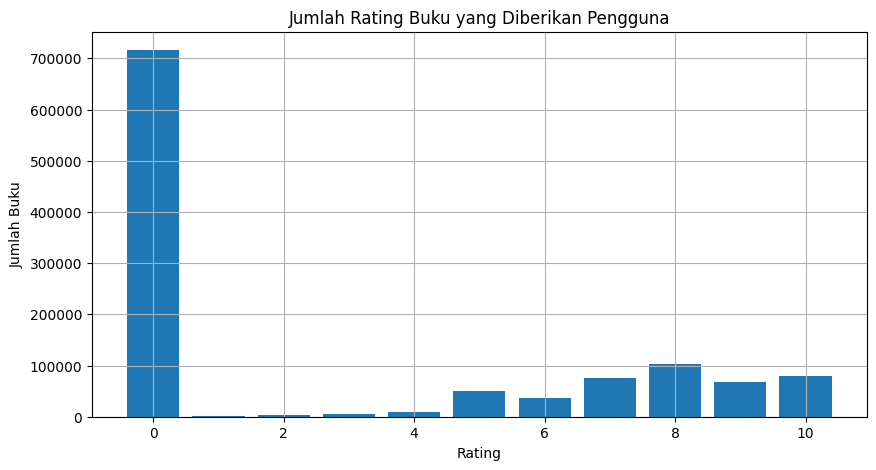

In [17]:
rating_counter = ratings.groupby('Book-Rating').count()
plt.figure(figsize=(10,5))
plt.title('Jumlah Rating Buku yang Diberikan Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah Buku')
plt.bar(rating_counter.index, rating_counter['ISBN'])
plt.grid(True)
plt.show()

Visualisasi di atas menunjukkan bahwa data bersifat tidak seimbang, dengan sebagian besar pengguna memberikan rating 0.


In [18]:
ratings.info()  # info struktur data ratings


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [19]:
ratings.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))  # statistik deskriptif dengan format angka lengkap


,User-ID,Book-Rating
count,1149780.000000,1149780.000000
mean,140386.395126,2.866950
std,80562.277718,3.854184
min,2.000000,0.000000
25%,70345.000000,0.000000
50%,141010.000000,0.000000
75%,211028.000000,7.000000
max,278854.000000,10.000000


Berdasarkan output di atas, file `Ratings.csv` berisi data rating buku yang diberikan oleh para pengguna. Dataset ini terdiri dari 1.149.780 baris dan 3 kolom, yaitu:

 - `User-ID` : berisi ID unik pengguna
 - `ISBN` : berisi kode ISBN buku yang diberi rating oleh pengguna
 - `Book-Rating` : berisi nilai rating yang diberikan oleh pengguna berkisar antara 0-10

### Users

Berikut ini adalah isi dari `Users.csv`

In [20]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [22]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


Dari hasil output sebelumnya, file `Users.csv` berisi informasi tentang pengguna. Dataset ini memiliki 278.858 baris dan mencakup 3 kolom, yaitu:

- `User-ID` : berisi ID unik pengguna
- `Location` : berisi data lokasi pengguna
- `Age` : berisi data usia pengguna

## Data Preparation
Sebelum memasuki tahap pemodelan, data perlu diproses melalui tahap *data preparation* terlebih dahulu. Berikut ini merupakan langkah-langkah yang dilakukan dalam proses tersebut:


### Handling Imbalanced Data

Karena sebelumnya diketahui bahwa data rating bersifat tidak seimbang, pada tahap ini saya melakukan pembersihan dengan menghapus data yang memiliki rating 0.


In [23]:
ratings.drop(ratings[ratings["Book-Rating"] == 0].index, inplace=True)

Berikut ini adalah jumlah data setelah di-drop

In [24]:
ratings.shape

(433671, 3)

In [25]:
ratings

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


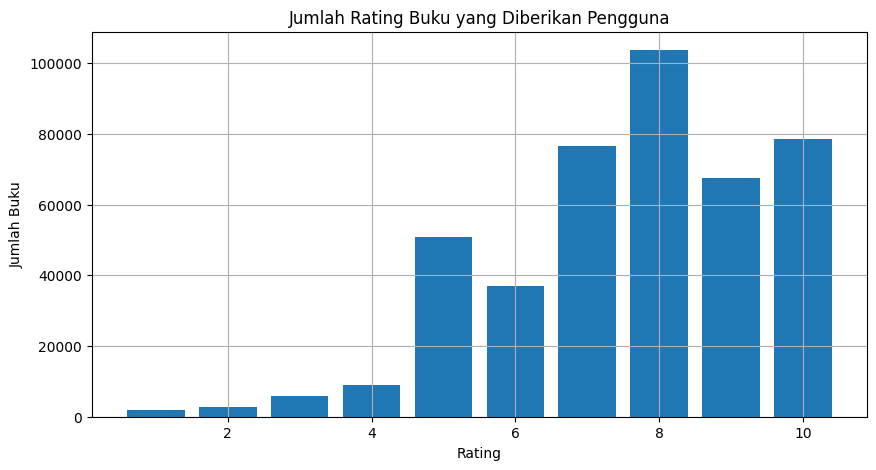

In [26]:
rating_counter = ratings.groupby('Book-Rating').count()
plt.figure(figsize=(10,5))
plt.title('Jumlah Rating Buku yang Diberikan Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah Buku')
plt.bar(rating_counter.index, rating_counter['ISBN'])
plt.grid(True)
plt.show()

### Encoding Data

Encoding dilakukan untuk menyandikan `User-ID` dan `ISBN` ke dalam indeks integer

In [27]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = ratings['User-ID'].unique().tolist()

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [28]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
isbn_list = ratings['ISBN'].unique().tolist()

# Melakukan encoding ISBN
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_list)}

# Melakukan proses encoding angka ke ISBN
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_list)}

Setelah itu hasil dari encoding akan dimapping ke dataframe `ratings`

In [29]:
# Mapping userID ke dataframe user
ratings['user'] = ratings['User-ID'].map(user_to_user_encoded)

In [30]:
# Mapping userID ke dataframe user
ratings['book'] = ratings['ISBN'].map(isbn_to_isbn_encoded)

In [31]:
ratings

,User-ID,ISBN,Book-Rating,user,book
1,276726,0155061224,5,0,0
3,276729,052165615X,3,1,1
4,276729,0521795028,6,1,2
6,276736,3257224281,8,2,3
7,276737,0600570967,6,3,4
...,...,...,...,...,...
1149773,276704,0806917695,5,77801,185971
1149775,276704,1563526298,9,77801,121200
1149777,276709,0515107662,10,77802,23986
1149778,276721,0590442449,10,77803,151038


In [32]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433671 entries, 1 to 1149779
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      433671 non-null  int64 
 1   ISBN         433671 non-null  object
 2   Book-Rating  433671 non-null  int64 
 3   user         433671 non-null  int64 
 4   book         433671 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 19.9+ MB


### Randomize Dataset

Berikut merupakan proses pengacakan data untuk memastikan distribusi data menjadi acak.


In [33]:
# Mengacak dataset
df = ratings.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,book
144846,32440,0380018179,8,9713,1013
211411,49144,8422641127,5,14390,54663
647520,156424,3442453844,7,44370,127953
30124,7125,0060586125,8,2587,10359
1052982,251606,0316789844,8,70897,7053
...,...,...,...,...,...
658592,159834,0441132456,7,45235,70428
958724,231613,0747542333,5,65186,33018
335707,79923,0440206154,8,22993,6822
373697,89610,8880891960,5,25753,84887


### Data Standardization and Splitting

Setelah data diacak, dataset kemudian dibagi menjadi dua bagian: 80% untuk melatih model dan 20% untuk validasi.

Selain itu, nilai rating yang awalnya berada pada rentang 0 hingga 10 juga distandarisasi ke dalam rentang 0 hingga 1 guna mempermudah proses pelatihan model.


In [34]:
# Menghitung jumlah pengguna
num_users = len(user_to_user_encoded)
print(num_users)

# Menghitung jumlah buku berdasarkan ISBN
num_isbn = len(isbn_encoded_to_isbn)
print(num_isbn)

# Mengonversi kolom rating ke tipe float
df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)

# Menentukan nilai rating minimum
min_rating = min(df['Book-Rating'])

# Menentukan nilai rating maksimum
max_rating = max(df['Book-Rating'])

# Menampilkan informasi jumlah user, jumlah ISBN, serta nilai rating minimum dan maksimum
print('Number of User: {}, Number of ISBN: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_isbn, min_rating, max_rating
))


77805
185973
Number of User: 77805, Number of ISBN: 185973, Min Rating: 1.0, Max Rating: 10.0


In [35]:
# Membuat variabel x yang berisi pasangan user dan book
x = df[['user', 'book']].values  # fitur input

# Membuat variabel y yang berisi nilai rating yang telah dinormalisasi
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values  # label output

# Membagi dataset menjadi 80% untuk pelatihan dan 20% untuk validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],     # data training (fitur)
    x[train_indices:],     # data validasi (fitur)
    y[:train_indices],     # data training (label)
    y[train_indices:]      # data validasi (label)
)

# Menampilkan isi variabel x dan y
print(x, y)


[[  9713   1013]
 [ 14390  54663]
 [ 44370 127953]
 ...
 [ 22993   6822]
 [ 25753  84887]
 [ 21414  43793]] [0.77777778 0.44444444 0.66666667 ... 0.77777778 0.44444444 0.77777778]


## Modelling

### Membuat Kelas RecommenderNet

Untuk memperoleh hasil model yang optimal, proyek ini memanfaatkan library `optuna` guna melakukan *hyperparameter tuning*, khususnya dalam mencari nilai terbaik untuk `embedding_size`.


-0

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_isbn, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_isbn = num_isbn
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.isbn_embedding = layers.Embedding(
            num_isbn,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.isbn_bias = layers.Embedding(num_isbn, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        isbn_vector = self.isbn_embedding(inputs[:, 1])
        isbn_bias = self.isbn_bias(inputs[:, 1])

        dot_product = tf.tensordot(user_vector, isbn_vector, 2)

        x = dot_product + user_bias + isbn_bias

        return tf.nn.sigmoid(x)

##Hyperparameter

Untuk memperoleh performa model yang optimal, proyek ini memanfaatkan library *Optuna* dalam proses *hyperparameter tuning*, yaitu pencarian kombinasi nilai hyperparameter terbaik. Pada kasus ini, parameter yang disesuaikan adalah nilai `embedding_size`.


In [44]:
import numpy as np

def objective(trial):
    tf.keras.backend.clear_session()
    model = RecommenderNet(num_users=num_users, num_isbn=num_isbn, embedding_size=trial.suggest_int('embedding_size', 1, 15))

    # model compile
    model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = keras.optimizers.Adam(learning_rate=0.001),
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

    model.fit(
        x = x_train,
        y = y_train,
        batch_size=200,
        epochs = 1,
        validation_data = (x_val, y_val)
    )

    y_pred= model.predict(x_val)

    # Calculate RMSE manually since squared=False is not supported
    return np.sqrt(mean_squared_error(y_val, y_pred))

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=15, timeout=500)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2025-06-13 09:33:27,932] A new study created in memory with name: no-name-f3cc0c09-6ba9-43a7-bdb5-9b387677549d


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.6604 - root_mean_squared_error: 0.2827 - val_loss: 0.5736 - val_root_mean_squared_error: 0.1972
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-06-13 09:33:46,611] Trial 0 finished with value: 0.2558111434632762 and parameters: {'embedding_size': 13}. Best is trial 0 with value: 0.2558111434632762.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.6621 - root_mean_squared_error: 0.2841 - val_loss: 0.5732 - val_root_mean_squared_error: 0.1971
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-06-13 09:34:08,007] Trial 1 finished with value: 0.2554477827212822 and parameters: {'embedding_size': 10}. Best is trial 1 with value: 0.2554477827212822.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.6590 - root_mean_squared_error: 0.2817 - val_loss: 0.5736 - val_root_mean_squared_error: 0.1973
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-06-13 09:34:30,308] Trial 2 finished with value: 0.2562352287664555 and parameters: {'embedding_size': 12}. Best is trial 1 with value: 0.2554477827212822.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.6703 - root_mean_squared_error: 0.2919 - val_loss: 0.5738 - val_root_mean_squared_error: 0.1983
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-06-13 09:34:47,964] Trial 3 finished with value: 0.2504575128967554 and parameters: {'embedding_size': 4}. Best is trial 3 with value: 0.2504575128967554.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6650 - root_mean_squared_error: 0.2871 - val_loss: 0.5732 - val_root_mean_squared_error: 0.1976
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-06-13 09:35:06,352] Trial 4 finished with value: 0.25338585051209983 and parameters: {'embedding_size': 5}. Best is trial 3 with value: 0.2504575128967554.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.6612 - root_mean_squared_error: 0.2835 - val_loss: 0.5737 - val_root_mean_squared_error: 0.1972
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-06-13 09:35:24,144] Trial 5 finished with value: 0.25565127855125647 and parameters: {'embedding_size': 14}. Best is trial 3 with value: 0.2504575128967554.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.6617 - root_mean_squared_error: 0.2839 - val_loss: 0.5735 - val_root_mean_squared_error: 0.1975
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-06-13 09:35:46,970] Trial 6 finished with value: 0.25581459587499367 and parameters: {'embedding_size': 9}. Best is trial 3 with value: 0.2504575128967554.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.6602 - root_mean_squared_error: 0.2826 - val_loss: 0.5731 - val_root_mean_squared_error: 0.1969
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


[I 2025-06-13 09:36:09,989] Trial 7 finished with value: 0.2558169784386414 and parameters: {'embedding_size': 11}. Best is trial 3 with value: 0.2504575128967554.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.6714 - root_mean_squared_error: 0.2921 - val_loss: 0.5753 - val_root_mean_squared_error: 0.2002
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-06-13 09:36:27,208] Trial 8 finished with value: 0.2512020785851731 and parameters: {'embedding_size': 1}. Best is trial 3 with value: 0.2504575128967554.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6650 - root_mean_squared_error: 0.2869 - val_loss: 0.5731 - val_root_mean_squared_error: 0.1975
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-06-13 09:36:43,140] Trial 9 finished with value: 0.25337800858500786 and parameters: {'embedding_size': 5}. Best is trial 3 with value: 0.2504575128967554.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.6676 - root_mean_squared_error: 0.2890 - val_loss: 0.5729 - val_root_mean_squared_error: 0.1977
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-06-13 09:37:04,290] Trial 10 finished with value: 0.2513701953560802 and parameters: {'embedding_size': 1}. Best is trial 3 with value: 0.2504575128967554.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6712 - root_mean_squared_error: 0.2922 - val_loss: 0.5754 - val_root_mean_squared_error: 0.2002
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-06-13 09:37:19,823] Trial 11 finished with value: 0.2512545315390847 and parameters: {'embedding_size': 2}. Best is trial 3 with value: 0.2504575128967554.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.6689 - root_mean_squared_error: 0.2903 - val_loss: 0.5734 - val_root_mean_squared_error: 0.1978
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-06-13 09:37:37,994] Trial 12 finished with value: 0.2513630639553858 and parameters: {'embedding_size': 4}. Best is trial 3 with value: 0.2504575128967554.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.6631 - root_mean_squared_error: 0.2852 - val_loss: 0.5730 - val_root_mean_squared_error: 0.1972
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-06-13 09:37:54,889] Trial 13 finished with value: 0.2538887080949766 and parameters: {'embedding_size': 7}. Best is trial 3 with value: 0.2504575128967554.


1735/1735 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6667 - root_mean_squared_error: 0.2886 - val_loss: 0.5727 - val_root_mean_squared_error: 0.1973
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


[I 2025-06-13 09:38:10,857] Trial 14 finished with value: 0.25211189598776274 and parameters: {'embedding_size': 3}. Best is trial 3 with value: 0.2504575128967554.


Number of finished trials: 15
Best trial:
  Value: 0.2504575128967554
  Params: 
    embedding_size: 4


### Melatih Model

In [47]:
# Get the best hyperparameters from the Optuna study
best_embedding_size = study.best_params['embedding_size']

# Create and compile the model with the best hyperparameters
model = RecommenderNet(
    num_users=num_users,
    num_isbn=num_isbn,
    embedding_size=best_embedding_size
)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


# Memulai melatih
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size=64,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
5421/5421 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.6613 - root_mean_squared_error: 0.2837 - val_loss: 0.5728 - val_root_mean_squared_error: 0.1971
Epoch 2/10
5421/5421 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.5649 - root_mean_squared_error: 0.1890 - val_loss: 0.5702 - val_root_mean_squared_error: 0.1948
Epoch 3/10
5421/5421 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.5538 - root_mean_squared_error: 0.1773 - val_loss: 0.5651 - val_root_mean_squared_error: 0.1897
Epoch 4/10
5421/5421 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.5473 - root_mean_squared_error: 0.1703 - val_loss: 0.5634 - val_root_mean_squared_error: 0.1881
Epoch 5/10
5421/5421 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.5429 - root_mean_squared_error: 0.1653 - val_loss: 0.5627 - val_root_mean_squared_error: 0.1876
Epoch 6/10
5421/5421 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.5389 - root_mean_squared_error: 0.1611 - val_loss: 0.5623 - val_root_mean_squared_error: 0.1874
Epoch 7/10
5421/5421 ━━━━━━━━━━━━━

## Evaluasi

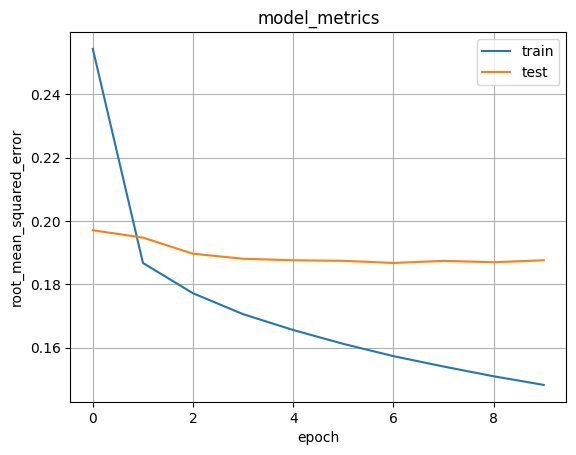

In [48]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

Berdasarkan metrik tersebut, dapat disimpulkan bahwa model yang dikembangkan memiliki nilai Root Mean Squared Error (RMSE) sebesar 0,185.


## Mendapatkan Rekomendasi

In [49]:
books_df = books
df = pd.read_csv('book-recommendation-dataset/Ratings.csv')

# Mengambil sample user
user_id = df['User-ID'].sample(1).iloc[0]
book_read_by_user = df[df['User-ID'] == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
book_not_read = books_df[~books_df['ISBN'].isin(book_read_by_user.ISBN.values)]['ISBN']
book_not_read = list(
    set(book_not_read)
    .intersection(set(isbn_to_isbn_encoded.keys()))
)

book_not_read = [[isbn_to_isbn_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

In [51]:
ratings = model.predict(user_book_array).flatten()

# Mengambil 10 indeks dengan rating tertinggi
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_isbns = [
    isbn_encoded_to_isbn.get(book_not_read[x][0]) for x in top_ratings_indices
]

# Menampilkan rekomendasi buku untuk pengguna
print('Menampilkan rekomendasi untuk pengguna:', user_id)
print('=' * 27)
print('Daftar buku dengan rating tinggi dari pengguna')
print('----------------------------------------')

# Mengambil 5 buku dengan rating tertinggi yang pernah dibaca pengguna
top_book_user = (
    book_read_by_user.sort_values(
        by='Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

book_df_rows = books_df[books_df['ISBN'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row._3, "-", row._2)

print('----------------------------------------')
print('10 Rekomendasi Buku Teratas')
print('----------------------------------------')

# Menampilkan 10 rekomendasi buku berdasarkan prediksi model
recommended_books = books_df[books_df['ISBN'].isin(recommended_book_isbns)]
for row in recommended_books.itertuples():
    print(row._3, "-", row._2)


4659/4659 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Menampilkan rekomendasi untuk pengguna: 228764
Daftar buku dengan rating tinggi dari pengguna
----------------------------------------
Jean M. Auel - The Clan of the Cave Bear (Earth's Children (Paperback))
Sue Harrison - Cry of the Wind : Book Two of the Storyteller Trilogy (Harrison, Sue. Storyteller Trilogy, Bk. 2.)
Sue Harrison - Mother Earth Father Sky
Maggie Osborne - Brides of Prairie Gold
----------------------------------------
10 Rekomendasi Buku Teratas
----------------------------------------
J.R.R. TOLKIEN - The Return of the King (The Lord of the Rings, Part 3)
Philip D. Eastman - Go, Dog, Go (I Can Read It All by Myself Beginner Books)
J. R. R. Tolkien - The Two Towers (The Lord of the Rings, Part 2)
Shel Silverstein - The Giving Tree
Bill Watterson - Scientific Progress Goes 'Boink':  A Calvin and Hobbes Collection
Bill Watterson - Calvin and Hobbes
Jodi Picoult - My Sister's Keeper : A Novel (Picoult, Jodi)
Scott Adams - Dilbe

## Penutup

Sebagai penutup, model rekomendasi buku telah berhasil dikembangkan dan diuji sehingga mampu menghasilkan daftar buku yang sesuai dengan preferensi pengguna. Model ini dapat menjadi dasar dalam pengembangan sistem rekomendasi berbasis machine learning yang dapat diimplementasikan lebih lanjut ke dalam bentuk aplikasi yang siap digunakan oleh masyarakat luas, seperti platform peminjaman buku digital, toko buku online, atau sistem manajemen perpustakaan.

Meskipun telah menunjukkan hasil yang cukup memuaskan, model ini masih memiliki ruang untuk ditingkatkan. Pengembangan selanjutnya dapat mencakup penambahan fitur baru seperti informasi genre, sinopsis, atau ulasan pengguna sebagai input tambahan untuk memperkaya konteks rekomendasi. Selain itu, penggunaan teknik yang lebih kompleks seperti *deep learning* atau *hybrid recommender systems* juga berpotensi meningkatkan akurasi dan relevansi hasil rekomendasi.

Dengan pengembangan berkelanjutan, diharapkan model ini tidak hanya memberikan hasil yang tepat sasaran, tetapi juga mampu menghadirkan pengalaman pengguna yang lebih personal dan bermanfaat.
